This notebook does sentiment analysis via Huggingface pipeline.
<mark>Don't loop through individual data in Python, do it with Numpy dataframe since the subroutines are in C++</mark>

# Read in datasets

In [1]:
from transformers import pipeline

# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
MODEL1 = "cardiffnlp/twitter-roberta-base-sentiment"
pipe1 = pipeline(model=MODEL1)

Downloading:   0%|          | 0.00/2.87k [00:00<?, ?B/s]

In [2]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv('../Datasets/fake-news/train.csv', usecols = ['id','title','text','label'])

# Split the training set (df) by real and fake news
df_t = df[df['label'] == 1]
df_f = df[df['label'] == 0]

# Drop rows containing NaN in either title or text columns
df_true = df_t.dropna(subset=['title','text'])
df_fake = df_f.dropna(subset=['title','text'])

# Further split into titles and texts
title_true = df_true.loc[:,'title'].tolist()
text_true = df_true.loc[:,'text'].tolist()
title_fake = df_fake.loc[:,'title'].tolist()
text_fake = df_fake.loc[:,'text'].tolist()

In [6]:
corpus_true = shuffle(title_true)
corpus_fake = shuffle(title_fake)

In [11]:
# TRUE NEWS

print("Labels 0 means negative sentiment, 1 means neutral, 2 means positive.\n")

for i in range(10):
    print(corpus_true[i], "\n", \
          "Label", \
          (pipe1(corpus_true[i]))[0]["label"][-1], \
          "\b,",
          round((pipe1(corpus_true[i]))[0]["score"],2))


Labels 0 means negative sentiment, 1 means neutral, 2 means positive.

Time Channel is a go 
 Label 1, 0.63
Shocking Development: FBI Re-Opens Probe Into Hillary Clinton Emails: “Perhaps Finally Justice Will Be Done” 
 Label 1, 0.57
[WATCH] Hillary Clinton’s “Crazy Eyes” Surface AGAIN! 
 Label 1, 0.51
WaPo: “Don’t Like Trump’s Piggish Prejudice? Blame the World of Golf.” 
 Label 0, 0.7
Trump Has Forever Changed American Politics 
 Label 1, 0.56
Michelle Obama Deletes Hillary Clinton From Twitter 
 Label 1, 0.74
Young Fellas Made Of Nothing These Days, Finds Scientific Study 
 Label 0, 0.54
White House Petition To Remove ‘Soros-Owned Voting Machines’ Hits 100,000+ Signatures 
 Label 1, 0.78
“Kindest People You’ve Ever Met”: American Journalist Describes Lebanon, Syrian Attitude After Trip 
 Label 1, 0.62
The exodus from Ukraine to Russia, 80,000 people a week 
 Label 0, 0.51


In [12]:
# FAKE NEWS

print("Labels 0 means negative sentiment, 1 means neutral, 2 means positive.\n")

for i in range(10):
    print(corpus_fake[i], "\n", \
          "Label", \
          (pipe1(corpus_fake[i]))[0]["label"][-1], \
          "\b,",
          round((pipe1(corpus_fake[i]))[0]["score"],2))


Labels 0 means negative sentiment, 1 means neutral, 2 means positive.

Top French Right-Winger Left Unconscious After Campaign Clash 
 Label 1, 0.63
Survey Shows Social Isolation, Sexual Rejection, but Much Sympathy for Transgender Americans - Breitbart 
 Label 1, 0.52
Justin Trudeau Faces Unprecedented Ethics Probe over Private Island Getaway with Imam - Breitbart 
 Label 1, 0.75
Teamsters’ Jimmy Hoffa Lavishes Praise on President Trump on Trade Policy - Breitbart 
 Label 1, 0.69
Trump Taps Peter Navarro, Vocal Critic of China, for New Trade Post - The New York Times 
 Label 1, 0.85
97% of Voters in Bankrupt Puerto Rico Want Statehood - Breitbart 
 Label 1, 0.86
Immigrants Who Came to U.S. as Children Fear Deportation Under Trump - The New York Times 
 Label 0, 0.6
$7 Million in Donations to Go Directly to Orlando Kin and Survivors - The New York Times 
 Label 1, 0.83
Marijuana Company Prepares to Cross State Lines, as Legally as Possible - The New York Times 
 Label 1, 0.89
Report: P

In [14]:
type(corpus_true)

list

In [15]:
cc = corpus_true[0:10]

In [16]:
type(cc)

list

In [17]:
cc

['Time Channel is a go',
 'Shocking Development: FBI Re-Opens Probe Into Hillary Clinton Emails: “Perhaps Finally Justice Will Be Done”',
 '[WATCH] Hillary Clinton’s “Crazy Eyes” Surface AGAIN!',
 'WaPo: “Don’t Like Trump’s Piggish Prejudice? Blame the World of Golf.”',
 'Trump Has Forever Changed American Politics',
 'Michelle Obama Deletes Hillary Clinton From Twitter',
 'Young Fellas Made Of Nothing These Days, Finds Scientific Study',
 'White House Petition To Remove ‘Soros-Owned Voting Machines’ Hits 100,000+ Signatures',
 '“Kindest People You’ve Ever Met”: American Journalist Describes Lebanon, Syrian Attitude After Trip',
 'The exodus from Ukraine to Russia, 80,000 people a week']

In [19]:
# TRUE NEWS, See distribution of scores of each label


n = 1000
tx = []
ty = []
tz = []

for i in range(n):
    t = pipe1(corpus_true[i])[0]["label"][-1]
    if t == "0":
        tx.append((pipe1(corpus_true[i]))[0]["score"])
    elif t == "1":
        ty.append((pipe1(corpus_true[i]))[0]["score"])
    else:
        tz.append((pipe1(corpus_true[i]))[0]["score"])

In [20]:
print(tx[0],ty[0])

0.7008301019668579 0.6274808049201965


In [21]:
# FAKE NEWS, See distribution of scores of each label

n = 1000
fx = []
fy = []
fz = []

for i in range(n):
    t = pipe1(corpus_fake[i])[0]["label"][-1]
    if t == "0":
        fx.append((pipe1(corpus_fake[i]))[0]["score"])
    elif t == "1":
        fy.append((pipe1(corpus_fake[i]))[0]["score"])
    else:
        fz.append((pipe1(corpus_fake[i]))[0]["score"])

In [22]:
print(fx[0], fy[0])

0.600692868232727 0.6261588335037231


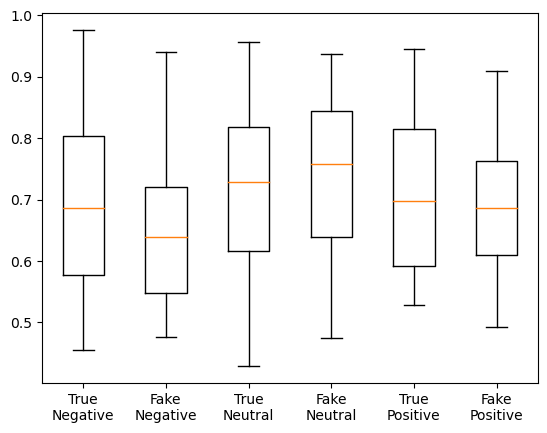

In [25]:
# Visualize scores for true and fake news with their labels
import matplotlib.pyplot as plt
import numpy as np

columns = [tx, fx, ty, fy, tz, fz]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5, 6], ["True\nNegative","Fake\nNegative", "True\nNeutral","Fake\nNeutral", "True\nPositive","Fake\nPositive"])
plt.show()

True news generally have higher confidence that the news is negative, when roBERTa predicts it is a negative news.

In [121]:
n = 1000
x = y = z = 0

for i in range(n):
    t = pipe1(corpus_fake[i])[0]["label"][-1] 
    if t == "0":
        # print(corpus_fake[i], "\n", round((pipe1(corpus_fake[i]))[0]["score"],2))
        x+=1
    elif t == "1":
        y+=1
    else:
        z+=1
print("# Label 0:",x, "; Proportion: ", x/n)
print("# Label 1:",y, "; Proportion: ", y/n)
print("# Label 2:",z, "; Proportion: ", z/n)

# Label 0: 574 ; Proportion:  0.574
# Label 1: 386 ; Proportion:  0.386
# Label 2: 40 ; Proportion:  0.04


# Sentiment analysis via pipeline

In [60]:
sentiment_true = [sent_pipeline(x) for x in corpus_true]

Note that the `joy` factor may not match intuition; for instance, the article
```
WATCH: Colbert HUMILIATES Trump With Scathing Takedown To Avenge Attack On John Dickerson 
```
has Label 0 (negative) with score 0.78 and a joy factor of score 0.78.